In [1]:
import pandas as pd
from io import StringIO

raw = """
Experience Years,Salary
1.1,39343
1.2,42774
1.3,46205
1.5,37731
2,43525
2.2,39891
2.5,48266
2.9,56642
3,60150
3.2,54445
3.2,64445
3.5,60000
3.7,57189
3.8,60200
3.9,63218
4,55794
4,56957
4.1,57081
4.3,59095
4.5,61111
4.7,64500
4.9,67938
5.1,66029
5.3,83088
5.5,82200
5.9,81363
6,93940
6.2,91000
6.5,90000
6.8,91738
7.1,98273
7.9,101302
8.2,113812
8.5,111620
8.7,109431
9,105582
9.5,116969
9.6,112635
10.3,122391
10.5,121872
"""

df = pd.read_csv(StringIO(raw))
df.head()


,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [2]:
df.info()
df.describe()
df.isna().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 772.0 bytes


0

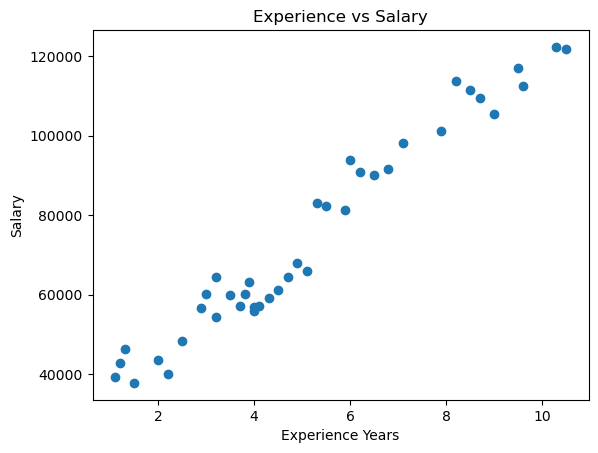

In [3]:
import matplotlib.pyplot as plt

plt.scatter(df["Experience Years"], df["Salary"])
plt.xlabel("Experience Years")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = df[["Experience Years"]]
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

mae, rmse, r2


(6419.911069460598, 6933.810724932834, 0.9068577573647874)

In [5]:
slope = model.coef_[0]
intercept = model.intercept_

print("Equation: Salary = {:.2f} * Experience + {:.2f}".format(slope, intercept))


Equation: Salary = 9408.03 * Experience + 26716.25
